<a href="https://colab.research.google.com/github/AnuragSen370/CNN-Example/blob/main/CNN_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

tesorflow: dl framework(used to train model
tfds to load the food-101 dataset
matplotlip.pyplot: for image plotting
numpy: For numerical operations and predictions

In [16]:
(ds_train, ds_test), ds_info = tfds.load(
    'food101',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True,
)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

KeyboardInterrupt: 

In [ ]:
print("Total Classes:", ds_info.features['label'].num_classes)
print("Class Names:", ds_info.features['label'].names[:10])


Total Classes: 101
Class Names: ['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio', 'beef_tartare', 'beet_salad', 'beignets', 'bibimbap', 'bread_pudding', 'breakfast_burrito']


In [ ]:
IMG_SIZE = 224
BATCH_SIZE = 32

def preprocess(image, label):
  image = tf.image.resize( image, [IMG_SIZE, IMG_SIZE]) # Resize to 224x224
  image = tf.cast(image, tf.float32) / 255.0
  return image, label

ds_train = ds_train.map(preprocess) .batch (BATCH_SIZE) .prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess).batch(BATCH_SIZE) .prefetch(tf.data.AUTOTUNE)


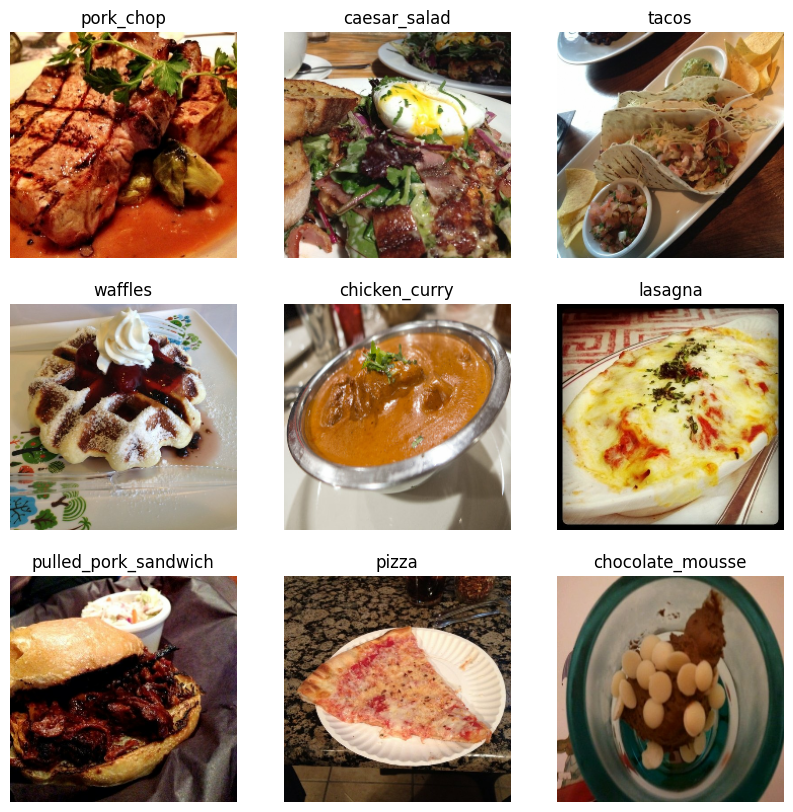

In [ ]:
for images, labels in ds_train.take(1):
  plt.figure(figsize=(10, 10))
  for i in range(9):
    ax = plt.subplot (3, 3, i + 1)
    plt.imshow(images[ i].numpy ( ))
    label = ds_info.features['label'].int2str(labels[i].numpy ( ) )
    plt.title(label)
    plt.axis("off")
  plt.show()

In [ ]:
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model. trainable = False

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(101, activation='softmax')
])

In [14]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

NameError: name 'model' is not defined

In [13]:
#STEP 9: Train the Model
history = model.fit(ds_train, epochs=1, validation_data=ds_test)

NameError: name 'model' is not defined

In [8]:
loss, accuracy = model.evaluate(ds_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

NameError: name 'model' is not defined

In [9]:
class_names = ds_info.features['label'].names

for images, labels in ds_test.take(1):
    image = images[0]
    true_label = class_names[labels[0].numpy()]

    prediction = model.predict(tf.expand_dims(image, axis=0))
    predicted_label = class_names[np.argmax(prediction)]

    plt.imshow(image)
    plt.title(f"Predicted: {predicted_label}\nTrue: {true_label}")
    plt.axis('off')
    plt.show()

NameError: name 'ds_info' is not defined

In [10]:
model.save("food101_model.h5")


NameError: name 'model' is not defined